# 01 - Junção Datasets Time Series Diferentes

## Introdução

A adição de novos atributos vindo de outras datasets que tenham a mesma escala de tempo e uma maneira bem interessante de engenharia de atributos que enriquece bastante nossos dados originais.

## Dataset

https://www.kaggle.com/anikannal/solar-power-generation-data/

## Importação

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Processamento

In [2]:
# Carga dados geração de energia
data_geracao = pd.read_csv('data-raw/Plant_1_Generation_Data.csv')
data_geracao['DATE_TIME'] = pd.to_datetime(data_geracao['DATE_TIME'], format='%d-%m-%Y %H:%M')
data_geracao.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,2020-05-15,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,2020-05-15,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,2020-05-15,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [3]:
data_geracao['SOURCE_KEY'].nunique()

22

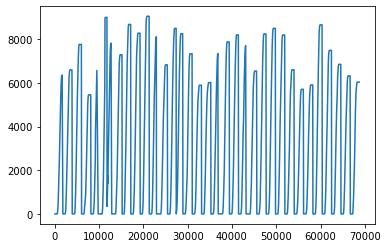

In [4]:
# Geração de energia de um único equipamento ao longo do tempo
data_geracao[data_geracao['SOURCE_KEY'] == '1IF53ai7Xc0U56Y']['DAILY_YIELD'].plot()
plt.show()

In [5]:
# Carga dados de clima
data_clima = pd.read_csv('data-raw/Plant_1_Weather_Sensor_Data.csv', parse_dates=['DATE_TIME'])
data_clima.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [6]:
data_clima['SOURCE_KEY'].nunique()

1

In [7]:
# Resumo da variável de tempo
data_clima['DATE_TIME'].describe()

<ipython-input-7-ceca3b535c8a>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data_clima['DATE_TIME'].describe()


count                    3182
unique                   3182
top       2020-06-09 12:30:00
freq                        1
first     2020-05-15 00:00:00
last      2020-06-17 23:45:00
Name: DATE_TIME, dtype: object

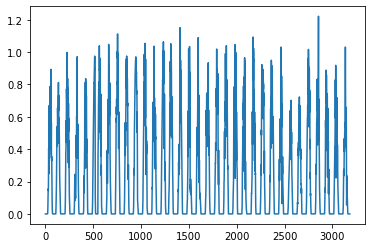

In [8]:
# Iradiação ao longo do tempo
data_clima['IRRADIATION'].plot()
plt.show()

## Junção Datasets

In [16]:
data_clima = data_clima.drop("SOURCE_KEY", axis=1)
data_full = pd.merge(data_geracao, data_clima, on=['DATE_TIME', 'PLANT_ID'], how='left')
data_full.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,25.184316,22.857507,0.0
1,2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,25.184316,22.857507,0.0
2,2020-05-15,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,25.184316,22.857507,0.0
3,2020-05-15,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,25.184316,22.857507,0.0
4,2020-05-15,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,25.184316,22.857507,0.0


In [17]:
# Agora podemos, por exemplo, calcular a correlação entre variáveis antes separadas
corr = data_full[['IRRADIATION', 'AC_POWER', 'DC_POWER']].corr(method='spearman')
corr

,IRRADIATION,AC_POWER,DC_POWER
IRRADIATION,1.000000,0.987893,0.987896
AC_POWER,0.987893,1.000000,1.000000
DC_POWER,0.987896,1.000000,1.000000


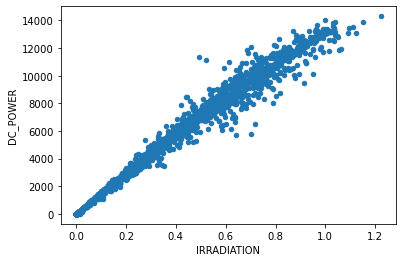

In [19]:
# Correlação em gráfico da irradiação pela geração de energia
data_full[data_full['SOURCE_KEY'] == '1IF53ai7Xc0U56Y'].plot.scatter(x='IRRADIATION', y='DC_POWER')
plt.show()

## Grava Dados Tratados

In [20]:
# data_full.to_parquet('data-processed/data_full.parquet')
data_full.to_csv('data-processed/data_full.csv', index=False)

# Fim